# 🎯 Detección de Fraude en Tarjetas de Crédito

Este proyecto tiene como objetivo identificar transacciones fraudulentas en un conjunto de datos de tarjetas de crédito. Utilizaremos técnicas de análisis exploratorio de datos (EDA), limpieza, y modelado predictivo para construir una solución reproducible que permita detectar fraudes con precisión.

### 📌 Contexto
El dataset proviene de transacciones realizadas por titulares de tarjetas de crédito europeos en septiembre de 2013. Cada transacción está representada por variables transformadas mediante PCA, junto con el monto (`Amount`) y una etiqueta (`Class`) que indica si fue fraudulenta (1) o no (0).

### 🧪 Objetivos específicos
- Cargar y limpiar el dataset.
- Realizar un análisis exploratorio para entender la distribución y relaciones entre variables.
- Implementar un modelo baseline reproducible.

By: David Silva Vallejo.


## ⚙️ Configuración inicial del entorno y librerías

En esta sección se realiza la configuración básica del entorno de trabajo para asegurar que todas las librerías necesarias estén disponibles y correctamente configuradas. Esto incluye:

- **Importación de librerías clave** para análisis de datos (`pandas`, `numpy`), visualización (`matplotlib`, `seaborn`), manipulación de rutas (`pathlib`) y estadísticas (`scipy`).
- **Supresión de advertencias** para evitar mensajes innecesarios durante la ejecución.
- **Verificación de versiones** de Python y `scikit-learn` para asegurar compatibilidad con el código.
- **Configuración de estilo de gráficos** para mejorar la estética de las visualizaciones.
- **Ajustes en `pandas`** para mostrar más columnas, filas y controlar el formato de los decimales.

Estas configuraciones ayudan a mantener el notebook limpio, reproducible y visualmente claro.

In [2]:
# Configuración inicial del entorno y librerías
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from packaging import version
import sklearn

warnings.filterwarnings('ignore')

# Verificar versión de Python
assert sys.version_info >= (3, 7), "Este notebook requiere Python 3.7 o superior"

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), "Requiere scikit-learn >= 1.0.1"


print(f"✅ scikit-learn {sklearn.__version__} instalado")
print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")
print("✅ Librerías importadas correctamente")

✅ scikit-learn 1.2.2 instalado
✅ Python 3.11 instalado correctamente
✅ Librerías importadas correctamente


## 🧾 Descripción detallada del dataset

El dataset **Credit Card Fraud Detection** contiene transacciones realizadas con tarjetas de crédito por titulares europeos en septiembre de 2013. Está diseñado para detectar transacciones fraudulentas.

### 📐 Estructura del dataset

- **Tamaño**: 284,807 filas × 31 columnas
- **Columnas**:
  - `Time`: Tiempo transcurrido en segundos desde la primera transacción registrada.
  - `V1` a `V28`: Variables transformadas mediante **Análisis de Componentes Principales (PCA)** para proteger la confidencialidad de los datos.
  - `Amount`: Monto de la transacción.
  - `Class`: Variable objetivo.  
    - `0` → Transacción legítima  
    - `1` → Transacción fraudulenta

### 📊 Estadísticas generales

- **Distribución de clases**:
  - Transacciones legítimas (`Class = 0`): ~99.83%
  - Transacciones fraudulentas (`Class = 1`): ~0.17%
  - Esto indica un **fuerte desbalance de clases**, lo cual es un reto común en problemas de detección de fraude.

- **Valores únicos**:  
  Cada columna tiene una cantidad distinta de valores únicos, siendo `Amount` y `Time` las más variables.

- **Tipos de datos**:
  - Todas las columnas son numéricas (`float64` o `int64`), lo que facilita el uso de algoritmos de machine learning sin necesidad de codificación adicional.

---

Este análisis inicial permite comprender la naturaleza del problema y preparar estrategias adecuadas para el modelado, como el uso de técnicas de balanceo o métricas específicas para datos desbalanceados.

In [3]:
# Lectura de DataSet en Kaggle
creditcard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
print(f"\n📊 Dataset cargado: {creditcard.shape[0]:,} filas × {creditcard.shape[1]} columnas")


📊 Dataset cargado: 284,807 filas × 31 columnas


## 🧮 Vista general del dataset

En esta sección se realiza una inspección inicial del dataset para entender su estructura y contenido. Esto incluye:

### 🔍 Información general (`info()`)

Se muestra:
- El número total de entradas (filas).
- El número de columnas.
- El tipo de datos de cada columna (`float64`, `int64`, etc.).
- La cantidad de valores no nulos por columna.

Esto permite identificar posibles problemas como columnas vacías, tipos incorrectos o necesidad de limpieza.

### 📊 Estadísticas descriptivas (`describe()`)

Se generan estadísticas básicas para cada columna numérica:
- **Media**, **desviación estándar**, **mínimo**, **máximo**, y **cuartiles**.
- Esto ayuda a detectar valores extremos (outliers), rangos amplios o distribuciones sesgadas.

> 💡 Las estadísticas están redondeadas a dos decimales para facilitar la lectura.

Esta vista general es clave para preparar el análisis exploratorio y definir estrategias de preprocesamiento.

In [18]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
creditcard.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(creditcard.describe().round(2).T)

                        INFORMACIÓN GENERAL DEL DATASET                         

                              ESTRUCTURA DE DATOS                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17 

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59



## 🧪 Validación de columnas faltantes

Antes de continuar con el análisis, es fundamental verificar si existen valores nulos en el dataset. Esto se realiza calculando el porcentaje de valores faltantes por columna.


In [5]:
#Validación de columnas faltantes
round(100 * (creditcard.isnull().sum()/len(creditcard)),2).sort_values(ascending=False)

Time     0.00
V16      0.00
Amount   0.00
V28      0.00
V27      0.00
V26      0.00
V25      0.00
V24      0.00
V23      0.00
V22      0.00
V21      0.00
V20      0.00
V19      0.00
V18      0.00
V17      0.00
V15      0.00
V1       0.00
V14      0.00
V13      0.00
V12      0.00
V11      0.00
V10      0.00
V9       0.00
V8       0.00
V7       0.00
V6       0.00
V5       0.00
V4       0.00
V3       0.00
V2       0.00
Class    0.00
dtype: float64

## ✅ Conclusión sobre valores faltantes

Tras ejecutar la validación, se observa que **ninguna columna contiene valores nulos**. Todas las columnas tienen un **0.00% de datos faltantes**, lo cual es ideal para el análisis y modelado.

> Esto significa que no es necesario aplicar técnicas de imputación ni eliminar columnas o filas por incompletitud. El dataset está limpio en cuanto a valores nulos, lo que facilita el trabajo posterior.


## 🧪 Validación de filas con valores faltantes

Además de verificar columnas, es útil revisar si existen **filas** con datos incompletos. Esto se hace calculando el porcentaje de valores nulos por fila.


In [21]:
#Validación de filas faltantes
round(100 * (creditcard.isnull().sum(axis=1)/len(creditcard)),2).sort_values(ascending=False)

0        0.00
189869   0.00
189875   0.00
189874   0.00
189873   0.00
         ... 
94942    0.00
94943    0.00
94944    0.00
94945    0.00
284806   0.00
Length: 284807, dtype: float64

## ✅ Conclusión sobre filas con valores faltantes

La salida muestra que **ninguna fila contiene valores nulos**. Todas las transacciones tienen un **0.00% de datos faltantes**, lo que indica que el dataset está completo a nivel de filas.

> Esto confirma que no es necesario eliminar ni imputar filas por incompletitud. El dataset está íntegro y listo para el análisis exploratorio y el modelado.


## 🧬 Validación de duplicados en el dataset

Es importante verificar si existen **filas duplicadas** en el dataset, ya que pueden distorsionar el análisis y el entrenamiento de modelos.


In [7]:
creditcard_duplicate=creditcard.copy()
creditcard_duplicate.drop_duplicates(subset=None, inplace=True)
print(creditcard.shape)
print(creditcard_duplicate.shape)
creditcard=creditcard_duplicate
del creditcard_duplicate

(284807, 31)
(283726, 31)


## ⚠️ Conclusión sobre duplicados

La salida muestra que el dataset original tiene **284,807 filas**, mientras que el dataset sin duplicados tiene **283,726 filas**. Esto indica que se han eliminado **1,081 filas duplicadas**.

> Aunque el número de duplicados es relativamente pequeño (~0.38%), eliminarlos mejora la calidad del análisis y evita que los modelos se entrenen con datos repetidos que podrían sesgar los resultados.

✅ El dataset ha sido depurado y ahora contiene únicamente transacciones únicas.

## 📊 Distribución de variables numéricas

Para entender mejor la naturaleza de cada variable en el dataset, se generan histogramas individuales para todas las columnas. Esto permite visualizar la distribución de los datos, detectar sesgos, outliers y patrones relevantes.

El siguiente código define una función `draw_histograms()` que:

- Recorre todas las columnas del dataset.
- Dibuja un histograma para cada una en una cuadrícula de 8 filas × 4 columnas.
- Aplica una escala logarítmica al eje Y para facilitar la visualización de distribuciones con conteos muy desbalanceados.
- Usa un estilo visual uniforme para mejorar la legibilidad.

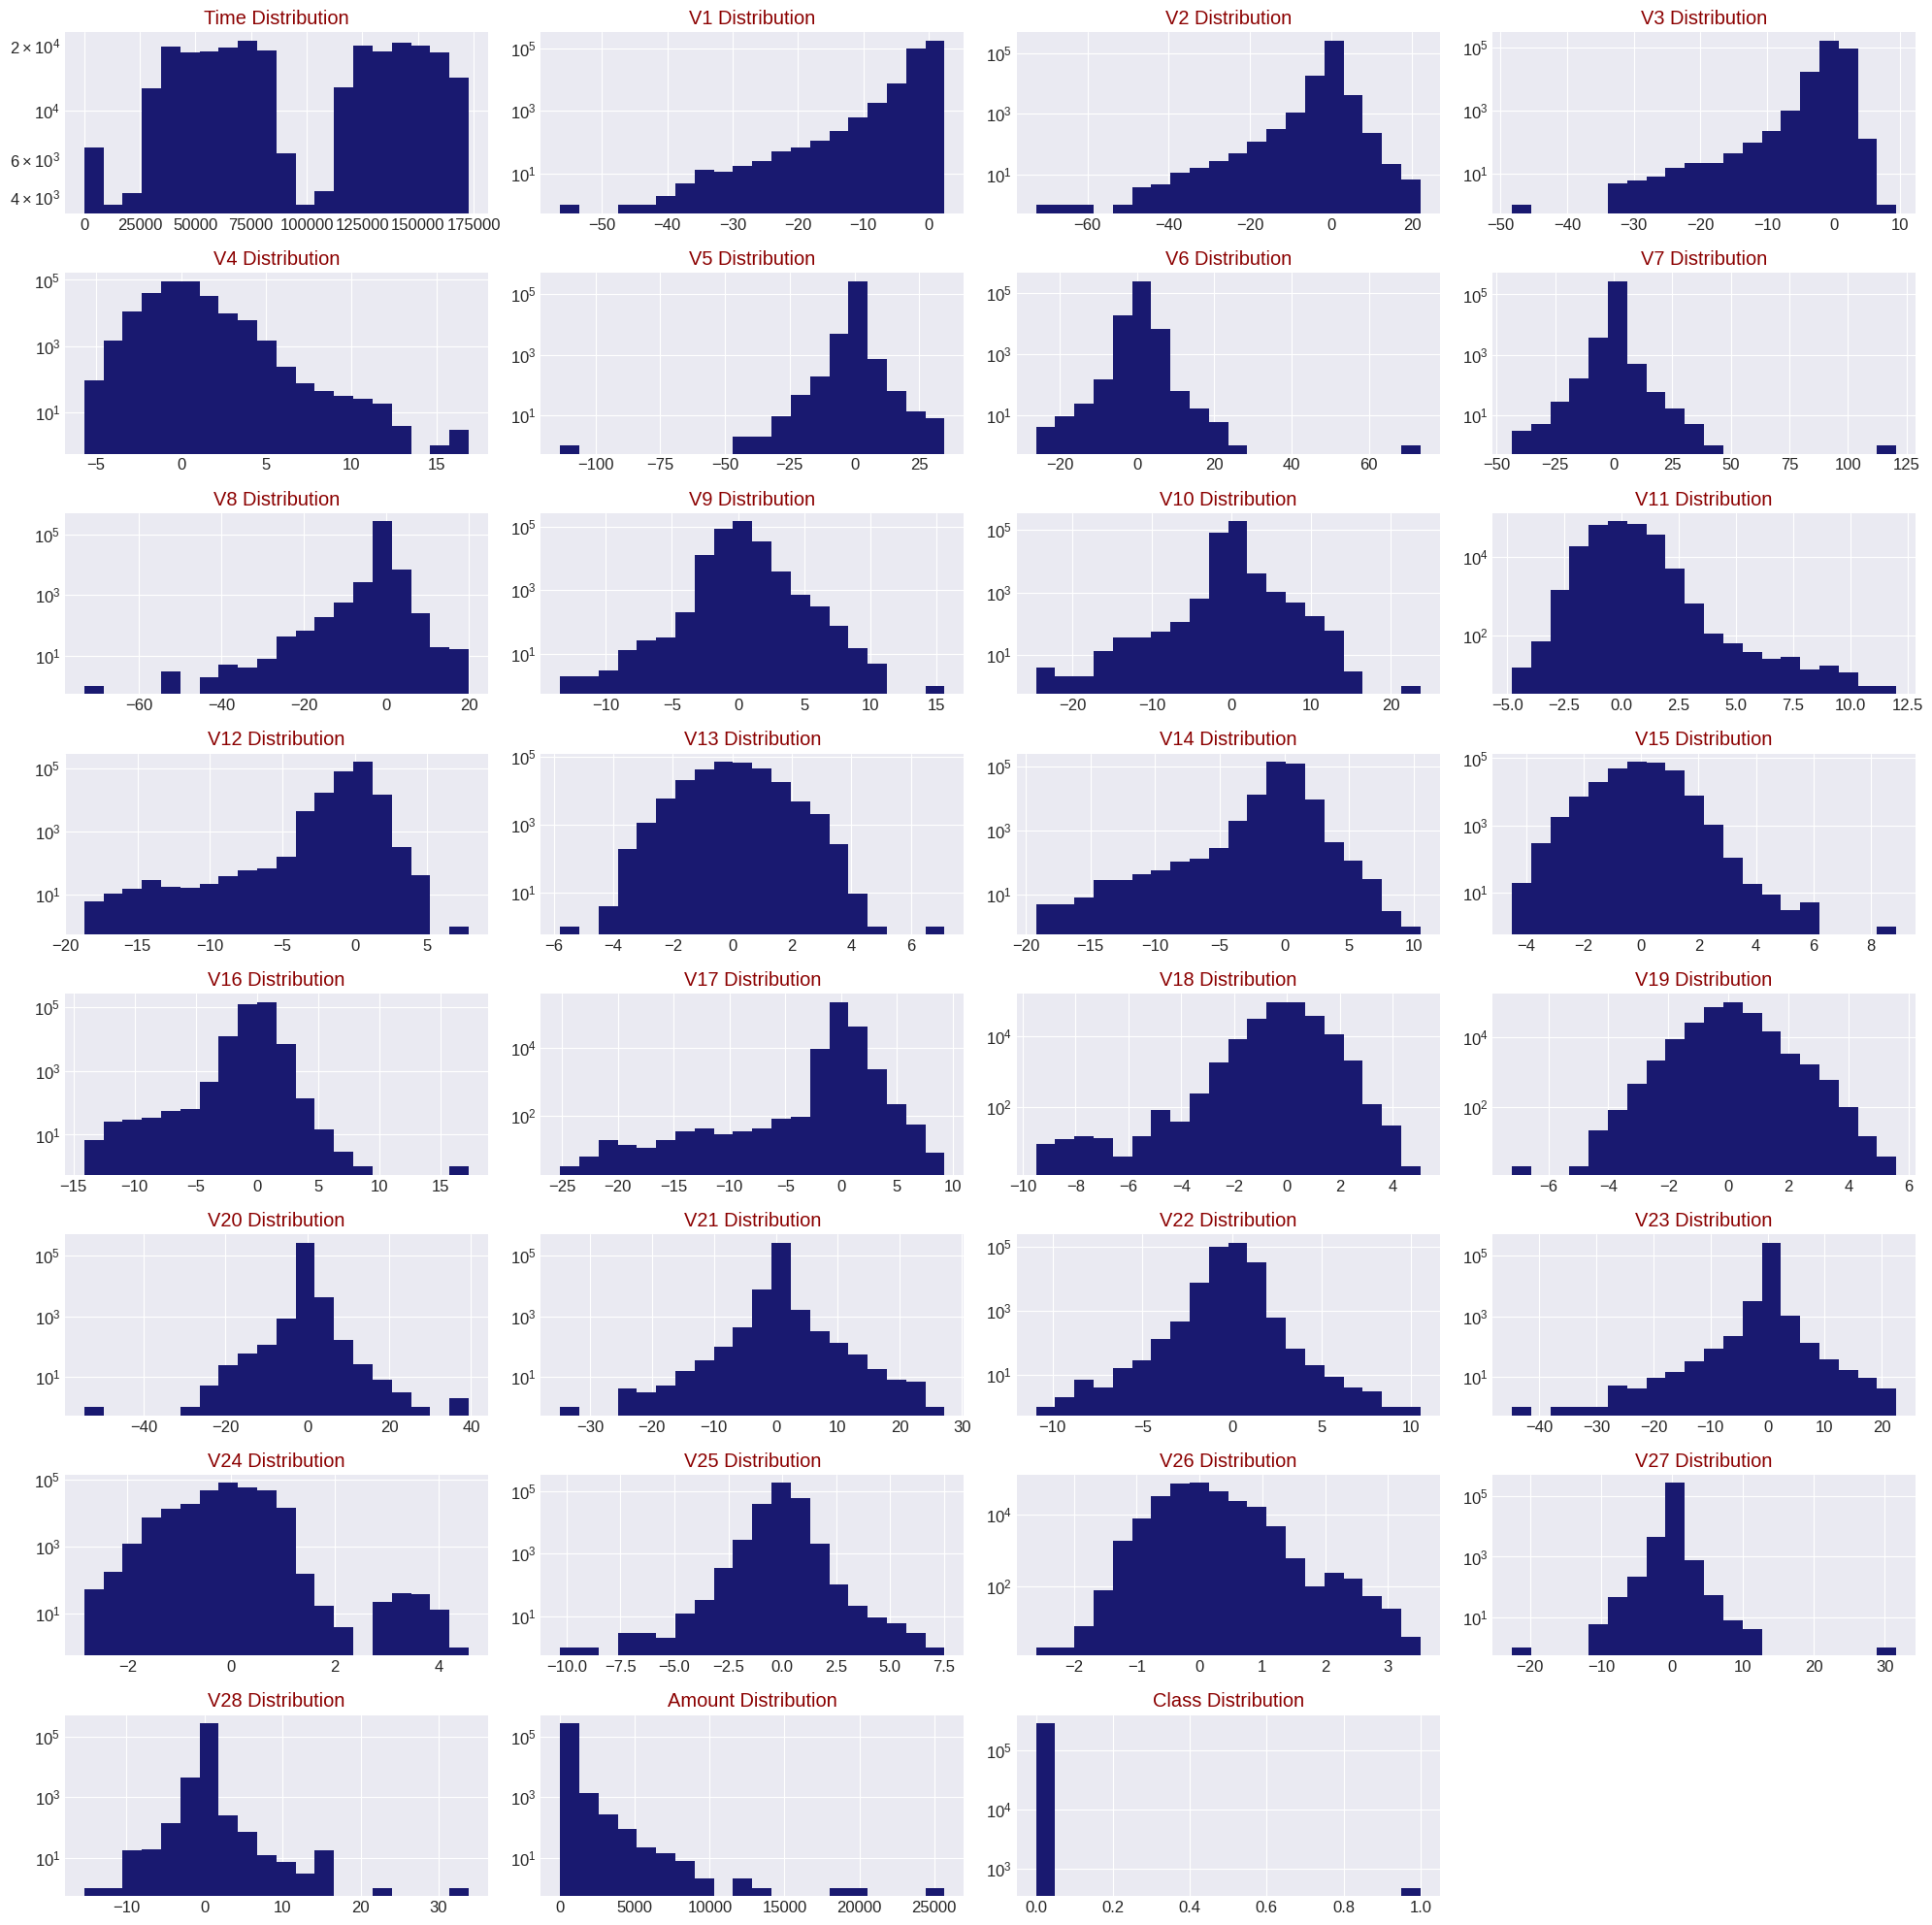

In [28]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(creditcard,creditcard.columns,8,4)


## 🧮 Distribución de la variable objetivo `Class`

La variable `Class` indica si una transacción es fraudulenta (`1`) o legítima (`0`). Analizar su distribución es fundamental para entender el desbalance de clases en el dataset.


In [30]:
creditcard.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

## ⚠️ Conclusión sobre la distribución de clases

La salida muestra una **fuerte desproporción** entre clases:

- `Class = 0` (No fraude): 284,315 transacciones (~99.83%)
- `Class = 1` (Fraude): 492 transacciones (~0.17%)

> Este desbalance extremo implica que los modelos podrían aprender a predecir siempre "no fraude" si no se toman medidas adecuadas.

✅ Es necesario aplicar técnicas de balanceo o usar métricas específicas como **precision**, **recall**, **F1-score** y **AUC-ROC** para evaluar correctamente el rendimiento del modelo.

<function matplotlib.pyplot.show(close=None, block=None)>

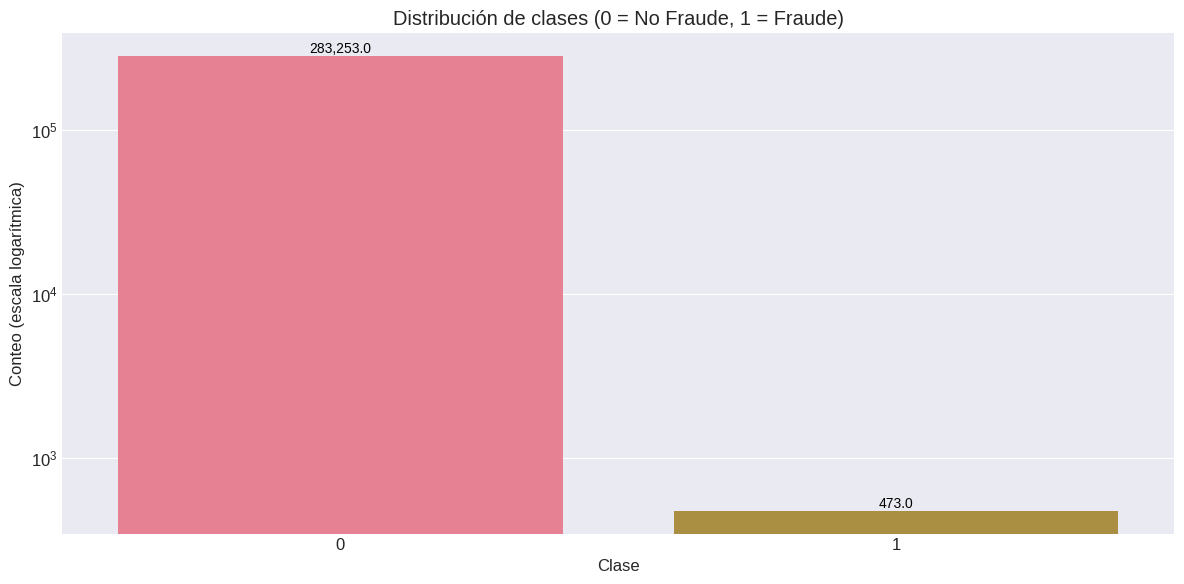

In [33]:
ax = sns.countplot(x='Class', data=creditcard)
ax.set_yscale('log')

# Agregar etiquetas con los valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black')

plt.title('Distribución de clases (0 = No Fraude, 1 = Fraude)')
plt.xlabel('Clase')
plt.ylabel('Conteo (escala logarítmica)')
plt.tight_layout()
plt.show



## 🔥 Mapa de calor de correlación entre variables

Para explorar las relaciones entre las variables numéricas del dataset, se genera un **heatmap de correlación**. Este tipo de gráfico permite identificar:

- Variables altamente correlacionadas entre sí.
- Posibles redundancias o patrones que podrían influir en el modelado.
- Relación entre las variables PCA (`V1` a `V28`) y la variable objetivo `Class`.


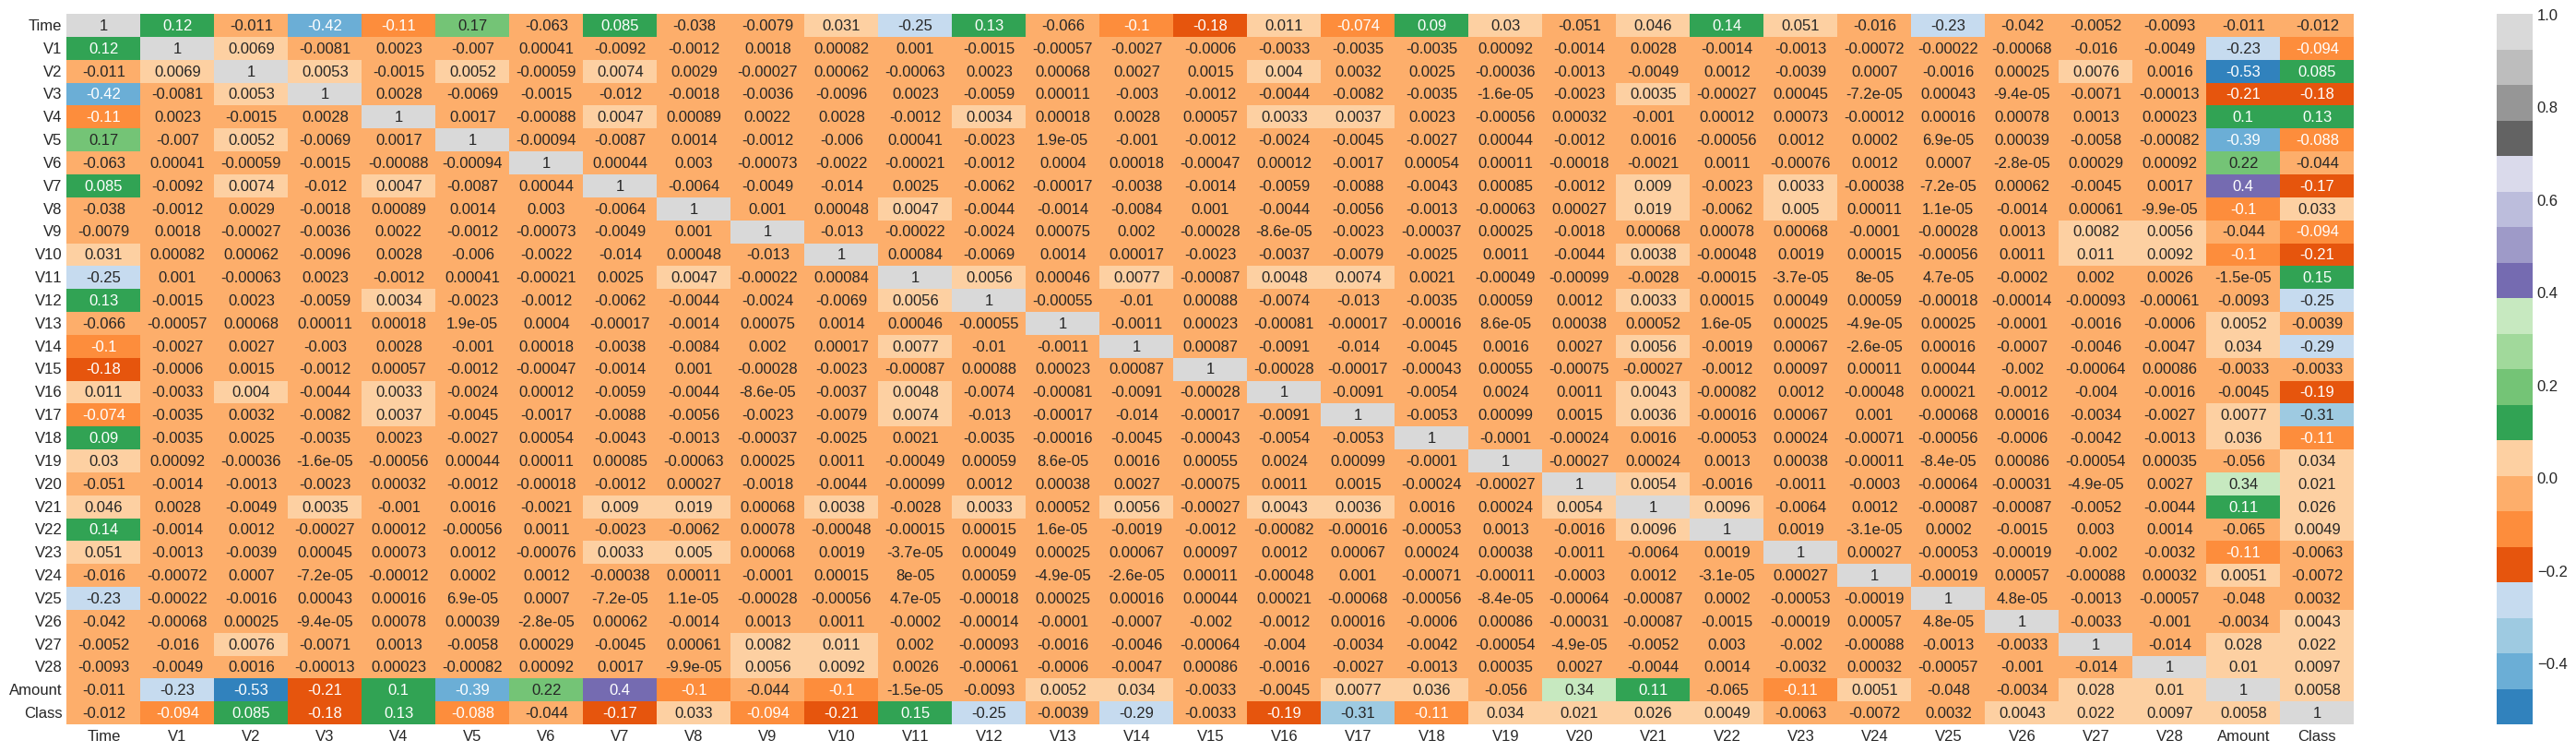

In [ ]:
plt.figure(figsize = (40,10))
sns.heatmap(creditcard.corr(), annot = True, cmap="tab20c")
plt.show()

## ✅ Conclusión sobre el mapa de correlación

El heatmap revela que:

- Las variables `V1` a `V28` tienen correlaciones variadas entre sí, algunas positivas y otras negativas, como resultado del proceso de PCA.
- La variable `Amount` muestra correlaciones bajas con la mayoría de las variables PCA.
- La variable `Class` tiene correlaciones débiles con las demás variables, lo cual es común en problemas de clasificación con datos transformados.

> Aunque no hay correlaciones extremadamente altas, este análisis ayuda a entender la estructura interna del dataset y puede orientar la selección de variables o la ingeniería de características.